In [1]:
# Get helper_functions.py script from Github
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2025-09-30 07:08:48--  https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-09-30 07:08:48 (103 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/refs/heads/main/Transfer_Learning_in_Tensorflow_part_2_fine_tuning.ipynb

--2025-09-30 07:08:57--  https://raw.githubusercontent.com/databyhuseyn/DeepLearning/refs/heads/main/Transfer_Learning_in_Tensorflow_part_2_fine_tuning.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1387924 (1.3M) [text/plain]
Saving to: ‘Transfer_Learning_in_Tensorflow_part_2_fine_tuning.ipynb’

Transfer_Learning_i 100%[===================>]   1.32M  --.-KB/s    in 0.03s   

2025-09-30 07:08:57 (42.4 MB/s) - ‘Transfer_Learning_in_Tensorflow_part_2_fine_tuning.ipynb’ saved [1387924/1387924]



# **10% of Food Data**

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data('10_food_classes_10_percent.zip')

--2025-09-30 07:08:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.207, 74.125.199.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   148MB/s    in 1.1s    

2025-09-30 07:08:59 (148 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
# Walk through 10 percent data directory and list numbers of files
walk_through_dir('/content/10_food_classes_10_percent')

There are 2 directories and 0 images in '/content/10_food_classes_10_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '/content/10_food_classes_10_

In [5]:
train_dir = '/content/10_food_classes_10_percent/train/'
test_dir = '/content/10_food_classes_10_percent/test/'

In [6]:
import tensorflow as tf
IMG_SIZE = (224, 224)
batch_size = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size = batch_size)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size = IMG_SIZE,
                                                                           label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [8]:
# Check out the class names of our dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [9]:
# see and example batch of data
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[1.80500000e+02 1.54086731e+02 7.11989822e+01]
   [1.90714279e+02 1.67571426e+02 9.05714340e+01]
   [1.76658157e+02 1.57719391e+02 9.03724442e+01]
   ...
   [9.07652283e+00 7.07652283e+00 8.50505066e+00]
   [9.95413876e+00 7.95413876e+00 8.95413876e+00]
   [1.34131727e+01 1.14131727e+01 1.24131727e+01]]

  [[1.61234695e+02 1.34499985e+02 6.02346916e+01]
   [1.60198975e+02 1.37051025e+02 6.86173477e+01]
   [1.46086731e+02 1.26372444e+02 6.56734695e+01]
   ...
   [9.98469543e+00 7.98469543e+00 8.98469543e+00]
   [1.10765448e+01 1.00765448e+01 8.07654476e+00]
   [1.06632252e+01 9.66322517e+00 7.66322517e+00]]

  [[1.34183670e+02 1.08127556e+02 4.49183655e+01]
   [1.33658157e+02 1.11301025e+02 5.44132652e+01]
   [1.26928566e+02 1.06545914e+02 5.75969391e+01]
   ...
   [7.76522827e+00 6.76522827e+00 2.76522827e+00]
   [9.21428585e+00 8.21428585e+00 4.00000000e+00]
   [1.20715332e+01 1.10715332e+01 6.85724735e+00]]

  ...

  [[8.26989822e+01 3.70509872e+01 2.98976779e+00]
   [8

# Transfer Learning

In [10]:
# Create base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# Freeze the base model
base_model.trainable = False

# Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='input_layer')

# Pass the inputs into the base_model (note: using tf.keras.applications, EfficientNetV2 inputs don't have to be normalizer)
x = base_model(inputs)
# Check data shape after passing it to base model
print(f'Shape after base_model: {x.shape}')

# Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f'Shape after GlobalAveragePooling2D(): {x.shape}')

# Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

# Combine the inputs with the outputs into a mode
model_0 = tf.keras.Model(inputs, outputs)

# Compile the model
model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model (we use less steps for validation so it's faster)
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data_10_percent,
                                 validation_steps=int(0.25 * len(test_data_10_percent)),
                                 callbacks=[create_tensorboard_callback('transfer_learning', '10_percent_feature_extract')])

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape after base_model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20250930-070909
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.2346 - loss: 2.1819 - val_accuracy: 0.6875 - val_loss: 1.3949
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 293ms/step - accuracy: 0.7217 - loss: 1.2761 - val_accuracy: 0.7977 - val_loss: 0.9329
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.8246 - loss: 0.8812 - val_accuracy: 0.8355 - val_loss: 0.7437
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.8540 - loss: 0.6926 - val_accuracy: 0.8602 - val_loss: 0.6183
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.8866 - loss: 0.6217 - val_accuracy: 0.8438 - val_loss: 0.5927


In [11]:
# Check layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, '|', layer, '|', layer.name)

0 | <InputLayer name=input_layer, built=True> | input_layer
1 | <Rescaling name=rescaling, built=True> | rescaling
2 | <Normalization name=normalization, built=True> | normalization
3 | <Conv2D name=stem_conv, built=True> | stem_conv
4 | <BatchNormalization name=stem_bn, built=True> | stem_bn
5 | <Activation name=stem_activation, built=True> | stem_activation
6 | <Conv2D name=block1a_project_conv, built=True> | block1a_project_conv
7 | <BatchNormalization name=block1a_project_bn, built=True> | block1a_project_bn
8 | <Activation name=block1a_project_activation, built=True> | block1a_project_activation
9 | <Conv2D name=block2a_expand_conv, built=True> | block2a_expand_conv
10 | <BatchNormalization name=block2a_expand_bn, built=True> | block2a_expand_bn
11 | <Activation name=block2a_expand_activation, built=True> | block2a_expand_activation
12 | <Conv2D name=block2a_project_conv, built=True> | block2a_project_conv
13 | <BatchNormalization name=block2a_project_bn, built=True> | block2a_pro

In [12]:
base_model.summary()

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, None,      │          0 │ input_layer[0][0] │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, None,      │          0 │ rescaling[0][0]   │
│ (Normalization)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, None,      │        864 │ normalization[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, None,      │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, None,      │          0 │ stem_bn[0][0]     │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, None,      │      4,608 │ stem_activation[… │
│ (Conv2D)            │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, None,      │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, None,      │          0 │ block1a_project_… │
│ (Activation)        │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, None,      │      9,216 │ block1a_project_… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, None,      │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, None,      │          0 │ block2a_expand_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, None,      │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, None,      │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, None,      │     36,864 │ block2a_project_… │
│ (Conv2D)            │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, None,      │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, None,      │          0 │ block2b_expand_b

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5,919,312 (22.58 MB)

In [13]:
model_0.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,957,744 (22.73 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 25,622 (100.09 KB)

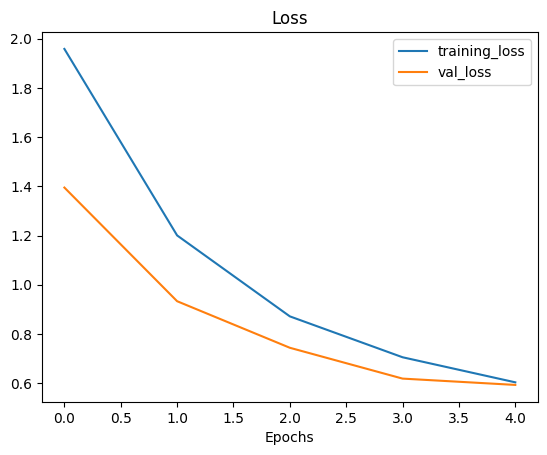

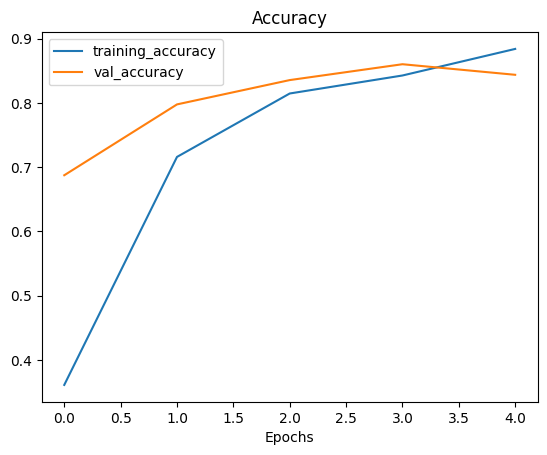

In [14]:
plot_loss_curves(history_10_percent)

In [15]:
# Define input tensor shape (same number of dimensions as the output of efficientnetv2-b0)
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f'Random input tensor:\n {input_tensor} \n')

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f'2D global average pooled random tensor:\n {global_average_pooled_tensor} \n')

# Check the shapes of the different tensors
print(f'Shape of input tensor:{input_tensor.shape}')
print(f'Shape of 2D global averaged pooled input tensor:{global_average_pooled_tensor.shape}')

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]] 

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]] 

Shape of input tensor:(1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor:(1, 3)


In [16]:
# This is the same as GlobalAveragePooling2D()
tf.reduce_mean(input_tensor, axis=[1, 2])     # average across the moddle axes

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

# Running a series of transfer learning experiments

In [17]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2025-09-30 07:10:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.188.207, 74.125.20.207, 108.177.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.188.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   203MB/s    in 0.6s    

2025-09-30 07:10:20 (203 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [18]:
walk_through_dir('/content/10_food_classes_1_percent')

There are 2 directories and 0 images in '/content/10_food_classes_1_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/hambur

In [19]:
import tensorflow as tf

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode='categorical',
                                                                           batch_size=batch_size,
                                                                           image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    # preprocessing.Rescaling(1./255)   # keep for ResNet50V2, remove for EfficientNetV2B0
], name='data_augmentation')

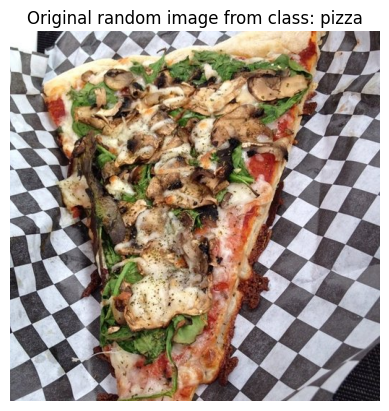

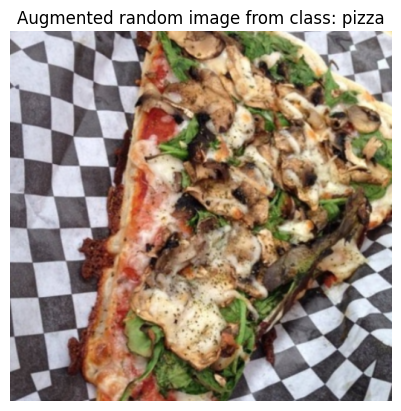

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)    # choose a random class
target_dir = '/content/10_food_classes_1_percent/train/' + target_class   # create target directory
random_image = random.choice(os.listdir(target_dir))      # choose a random image from target directory
random_image_path = target_dir + '/' + random_image       # Create the choosen random image path
img = mpimg.imread(random_image_path)         # plot the target image
plt.imshow(img)
plt.title(f'Original random image from class: {target_class}')
plt.axis(False)

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))      # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)      # requires normalization after augmentation
plt.title(f'Augmented random image from class: {target_class}')
plt.axis(False);

In [22]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    # preprocessing.Rescaling(1./255)   # keep for ResNet50V2, remove for EfficientNetV2B0
], name='data_augmentation')

In [23]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    # preprocessing.Rescaling(1./255)   # keep for ResNet50V2, remove for EfficientNetV2B0
], name='data_augmentation')

# Setup input shap and base model, freezing the base model layers
input_shape=(224, 224, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name='input_layer')

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Add a Resizing layer to resize images back to the expected input size
x = layers.Resizing(IMG_SIZE[0], IMG_SIZE[1])(x)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)

# Make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
model_1_history = model_1.fit(train_data_1_percent,
                              epochs=5,
                              steps_per_epoch=len(train_data_1_percent),
                              validation_data=test_data,
                              validation_steps=int(0.25 * len(test_data)),
                              callbacks=[create_tensorboard_callback('transfer_learning', '1_percent_data_aug')])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20250930-071024
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.0709 - loss: 2.5063 - val_accuracy: 0.1102 - val_loss: 2.2650
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.1196 - loss: 2.2215 - val_accuracy: 0.2023 - val_loss: 2.1569
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step - accuracy: 0.2165 - loss: 2.0842 - val_accuracy: 0.2664 - val_loss: 2.0705
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step - accuracy: 0.3362 - loss: 1.9705 - val_accuracy: 0.3289 - val_loss: 2.0010
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step - accuracy: 0.3700 - loss: 1.8575 - val_accuracy: 0.3454 - val_loss: 1.9435


In [24]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.3497 - loss: 1.9370


[1.9411100149154663, 0.35120001435279846]

# Model 2: Feature extraction transfer learning with 10 percent of data and data augmentation

In [25]:
train_dir_10 = '/content/10_food_classes_10_percent/train/'
test_dir_10 = '/content/10_food_classes_10_percent/test/'
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10,
                                                                            batch_size=batch_size,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical')
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir_10,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [26]:
base_model_2 = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False, input_shape=(224, 224, 3))
base_model_2.trainable=False

In [27]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0,2),
    # preprocessing.Rescaling(1/255) # keep for ResNet50v2, remove for EfficientNetv280
], name='data_augmentation')

In [28]:
inputs = layers.Input(shape=(224, 224, 3), name='input_layer')

x = data_augmentation(inputs)

x = base_model_2(x, training=False)

x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)

model_2_augmented = keras.Model(inputs, outputs)

model_2_augmented.compile(loss='categorical_crossentropy',
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['accuracy'])

model_2_augmented.fit(train_data_10_percent,
                      epochs=5,
                      # steps_per_epoch=len(train_data_10_percent),
                      validation_data=test_data_10_percent,
                      # validation_steps=int(0.25 * (len(train_data_10_percent))))
                      )

Epoch 1/5


ValueError: Exception encountered when calling RandomWidth.call().

[1mResize method is not implemented: 2[0m

Arguments received by RandomWidth.call():
  • inputs=tf.Tensor(shape=(None, None, 224, 3), dtype=float32)
  • training=True

In [29]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int=10,
                      learning_rate: float=1e-3,
                      training: bool =False) -> tf.keras.Model:

    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    base_model.trainable = training

    inputs = layers.Input(shape=input_shape, name='input_layer')

    data_augmentation = keras.Sequential([
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
        layers.RandomHeight(0.2),
        layers.RandomWidth(0.2),
    ], name='data_augmentation')


    x = data_augmentation(inputs)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
    outputs = layers.Dense(output_shape, activation='softmax', name='output_layer')(x)
    model = keras.Model(inputs, outputs)

    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate),
                  metrics=['accuracy'])

    return model

model_2 = create_base_model(input_shape=(*IMG_SIZE, 3))

# Creating a ModelCheckpoint callback

In [30]:
checkpoint_path = 'ten_percent_model_checkpoints_weights/checkpoint.weights.h5'

#Create a ModelCheckpoint callback that saves the models weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_freq='epoch',
                                                         save_best_only=True,
                                                         verbose=1)

In [31]:
train_data_10_percent.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [32]:
model_2.layers

[<InputLayer name=input_layer, built=True>,
 <Sequential name=data_augmentation, built=True>,
 <Functional name=efficientnetv2-b0, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling_layer, built=True>,
 <Dense name=output_layer, built=True>]

In [33]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),

], name = 'data_augmentation')

In [ ]:
initial_epoch = 5

history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epoch,
                                          validation_data=test_data_10_percent,
                                          callbacks=[checkpoint_callback])

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.1668 - loss: 2.2835

In [ ]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

In [ ]:
plot_loss_curves(history_10_percent_data_aug)

In [ ]:
model_2.load_weights(checkpoint_path)
loaded_weights_model_result = model_2.evaluate(test_data)

In [ ]:
results_10_percent_data_aug == loaded_weights_model_result

In [ ]:
import numpy as np
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_result))

# Model 3: Fine-tuning an existing model on 10% of the data

In [ ]:
model_2.layers

In [ ]:
for layer_number, layer in enumerate(model_2.layers):
  print(f'Layer number: {layer_number}')